In [ ]:
!pip install tensorflow


In [ ]:
!pip install keras

In [ ]:
#for reading and handling the data
import pandas as pd
import numpy as np
import os

In [ ]:
#for visualizinng and analyzing it
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#random forest model training
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,LeakyReLU
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsolutePercentageError

from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import SGD,Adam


In [ ]:
# Setting figure size
sns.set(rc={'figure.figsize':(11.7,8.27)})

**Loading Data from drive**

In [ ]:
df=pd.read_csv('/content/porter_data.csv.zip')

Printing the head and information of the data to get an understanding of it

In [ ]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   created_at                                    175777 non-null  object 
 2   actual_delivery_time                          175777 non-null  object 
 3   store_primary_category                        175777 non-null  int64  
 4   order_protocol                                175777 non-null  float64
 5   total_items                                   175777 non-null  int64  
 6   subtotal                                      175777 non-null  int64  
 7   num_distinct_items                            175777 non-null  int64  
 8   min_item_price                                175777 non-null  int64  
 9   max_item_price                                17

Data preprocessing

In [ ]:
df['created_at']=pd.to_datetime(df['created_at'])
df['actual_delivery_time']=pd.to_datetime(df['actual_delivery_time'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     175777 non-null  float64       
 1   created_at                                    175777 non-null  datetime64[ns]
 2   actual_delivery_time                          175777 non-null  datetime64[ns]
 3   store_primary_category                        175777 non-null  int64         
 4   order_protocol                                175777 non-null  float64       
 5   total_items                                   175777 non-null  int64         
 6   subtotal                                      175777 non-null  int64         
 7   num_distinct_items                            175777 non-null  int64         
 8   min_item_price                                175777 n

In [ ]:
df['time_taken']=df['actual_delivery_time'] - df['created_at']

In [ ]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,time_taken
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,0 days 00:47:00
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,0 days 00:44:00
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0 days 00:55:00
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,0 days 00:59:00
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,0 days 00:46:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                                        Non-Null Count   Dtype          
---  ------                                        --------------   -----          
 0   market_id                                     175777 non-null  float64        
 1   created_at                                    175777 non-null  datetime64[ns] 
 2   actual_delivery_time                          175777 non-null  datetime64[ns] 
 3   store_primary_category                        175777 non-null  int64          
 4   order_protocol                                175777 non-null  float64        
 5   total_items                                   175777 non-null  int64          
 6   subtotal                                      175777 non-null  int64          
 7   num_distinct_items                            175777 non-null  int64          
 8   min_item_price                              



*   Now that we have our time taken for the delivery we can convert it to minutes and that will be our target variable to train the models.
*   The timedelta is a datatype that stores the time difference and it is better we convert it to float and converting to minute does that as well



In [ ]:
df['time_taken_mins']=pd.to_timedelta(df['time_taken'])/pd.Timedelta('60s')

In [ ]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,time_taken,time_taken_mins
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,0 days 00:47:00,47.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,0 days 00:44:00,44.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0 days 00:55:00,55.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,0 days 00:59:00,59.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,0 days 00:46:00,46.0


We can also extract the hour at which the order was placed and which day of the week it was

In [ ]:
df['hour']=df['created_at'].dt.hour
df['day']=df['created_at'].dt.dayofweek

In [ ]:

df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,time_taken,time_taken_mins,hour,day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,0 days 00:47:00,47.0,22,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,0 days 00:44:00,44.0,21,1
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0 days 00:55:00,55.0,0,0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,0 days 00:59:00,59.0,3,3
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,0 days 00:46:00,46.0,2,1


Dropping the columns that are no longer required

In [ ]:
df.drop(['time_taken','created_at','actual_delivery_time'],axis=1,inplace=True)

In [ ]:
# Checking null values in the data
df.isna().sum()

,0
market_id,0
store_primary_category,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0
max_item_price,0
total_onshift_dashers,0
total_busy_dashers,0


**Plotting correlation to get an idea of the data**

<Axes: >

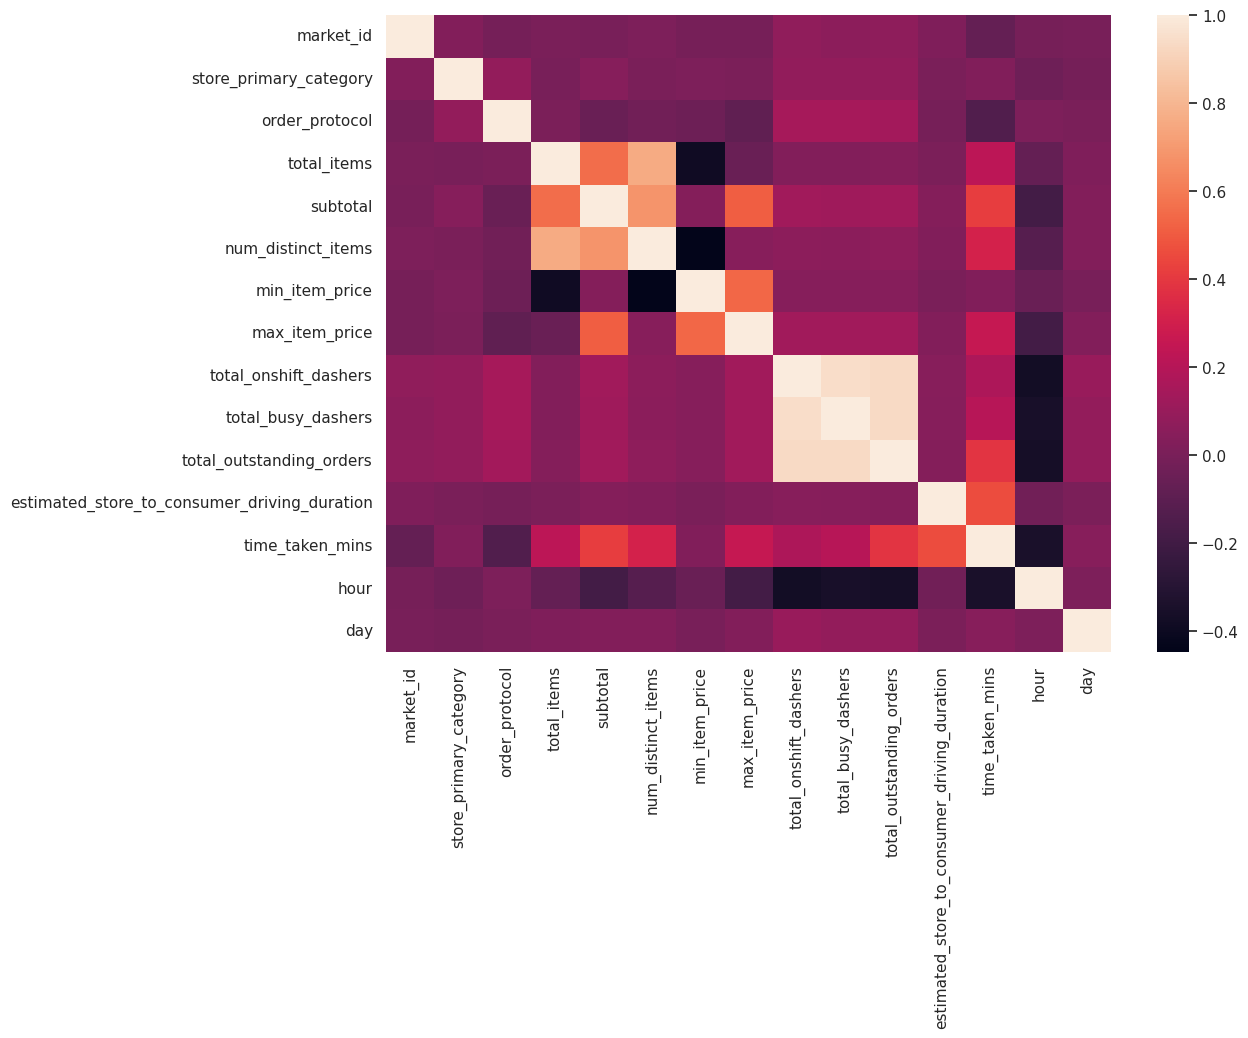

In [ ]:
sns.heatmap(df.corr())

we have one categorical column which we will change to integer for model

In [ ]:
df['store_primary_category']=df['store_primary_category'].astype('category').cat.codes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   store_primary_category                        175777 non-null  int8   
 2   order_protocol                                175777 non-null  float64
 3   total_items                                   175777 non-null  int64  
 4   subtotal                                      175777 non-null  int64  
 5   num_distinct_items                            175777 non-null  int64  
 6   min_item_price                                175777 non-null  int64  
 7   max_item_price                                175777 non-null  int64  
 8   total_onshift_dashers                         175777 non-null  float64
 9   total_busy_dashers                            17

Data Visualization and Cleaning

<Axes: xlabel='time_taken_mins', ylabel='subtotal'>

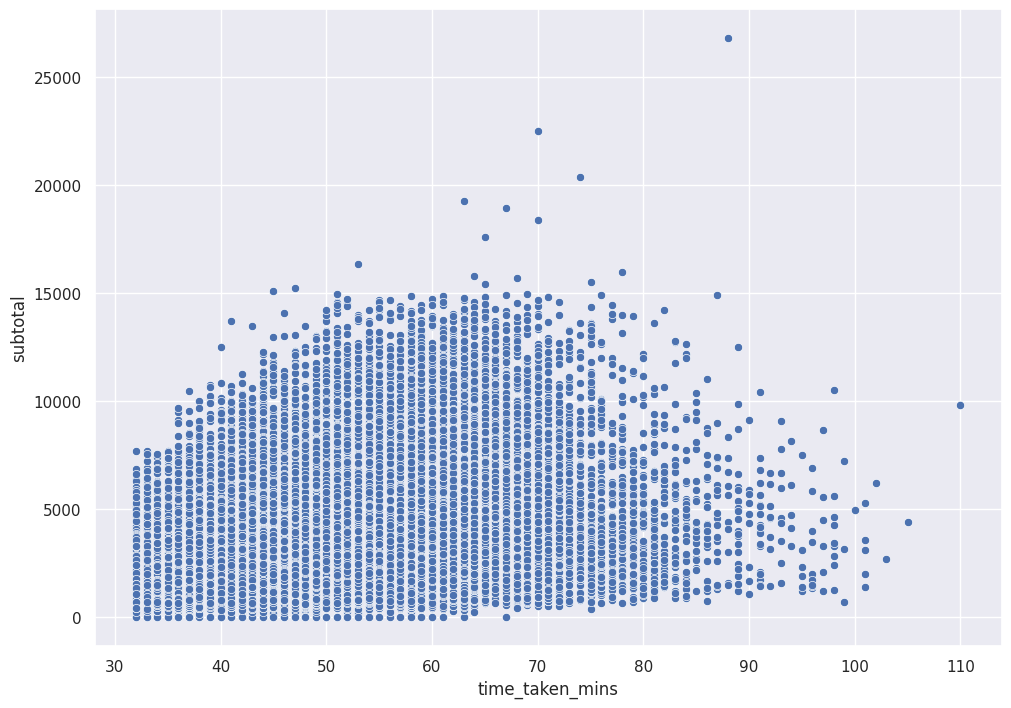

In [ ]:
sns.scatterplot(x='time_taken_mins',y='subtotal',data=df)

<Axes: xlabel='total_items', ylabel='subtotal'>

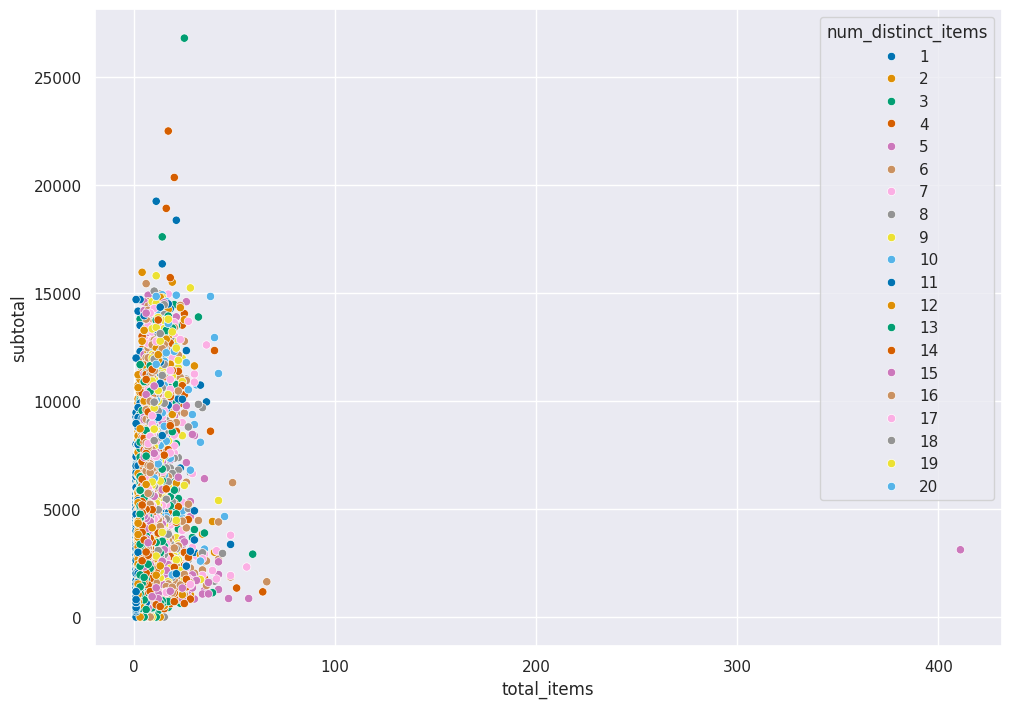

In [ ]:
sns.scatterplot(x='total_items',y='subtotal',hue='num_distinct_items',palette='colorblind',data=df)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
model1=LocalOutlierFactor()
#model1.fit(df)
df['lof_anomaly_score']=model1.fit_predict(df)

In [ ]:
print("number of outliers : ",(len(df.loc[(df['lof_anomaly_score'] == -1)])))
df=df.loc[(df['lof_anomaly_score'] == 1)]

number of outliers :  831


In [ ]:
df.drop(['lof_anomaly_score'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174946 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     174946 non-null  float64
 1   store_primary_category                        174946 non-null  int8   
 2   order_protocol                                174946 non-null  float64
 3   total_items                                   174946 non-null  int64  
 4   subtotal                                      174946 non-null  int64  
 5   num_distinct_items                            174946 non-null  int64  
 6   min_item_price                                174946 non-null  int64  
 7   max_item_price                                174946 non-null  int64  
 8   total_onshift_dashers                         174946 non-null  float64
 9   total_busy_dashers                            174946 

<Axes: xlabel='time_taken_mins', ylabel='subtotal'>

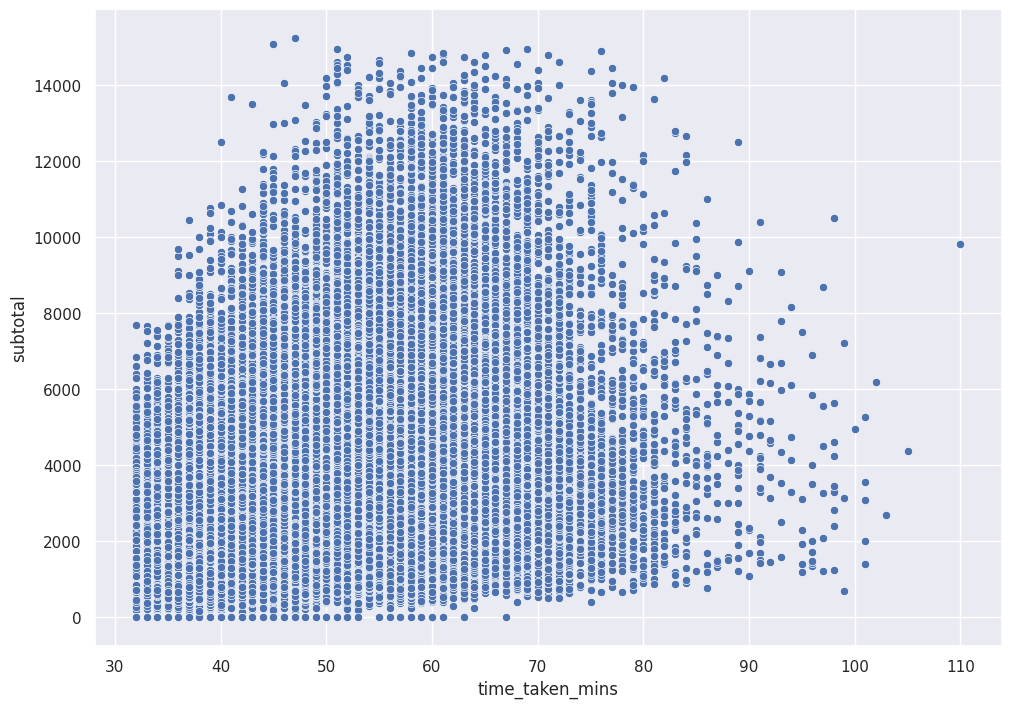

In [ ]:
sns.scatterplot(x='time_taken_mins',y='subtotal',data=df)

* We can see that after removing outliers our data is looking better

In [ ]:
df.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders',
       'estimated_store_to_consumer_driving_duration', 'time_taken_mins',
       'hour', 'day'],
      dtype='object')

<Axes: xlabel='day', ylabel='count'>

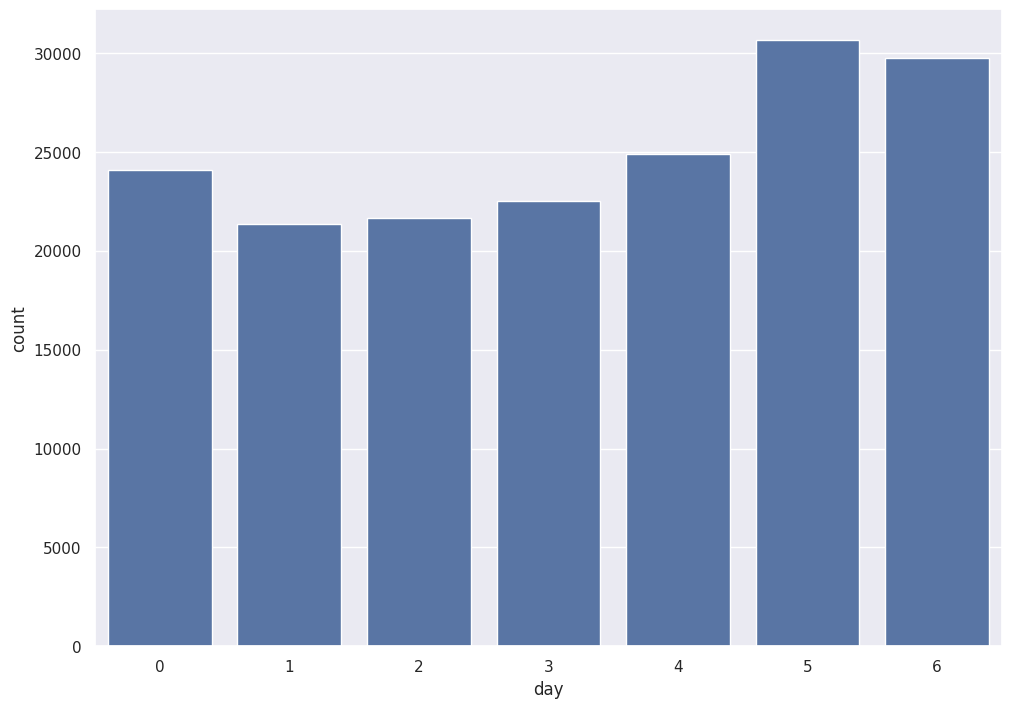

In [ ]:
sns.countplot(x=df.day)

* a little more orders on the weekends

<Axes: xlabel='hour', ylabel='count'>

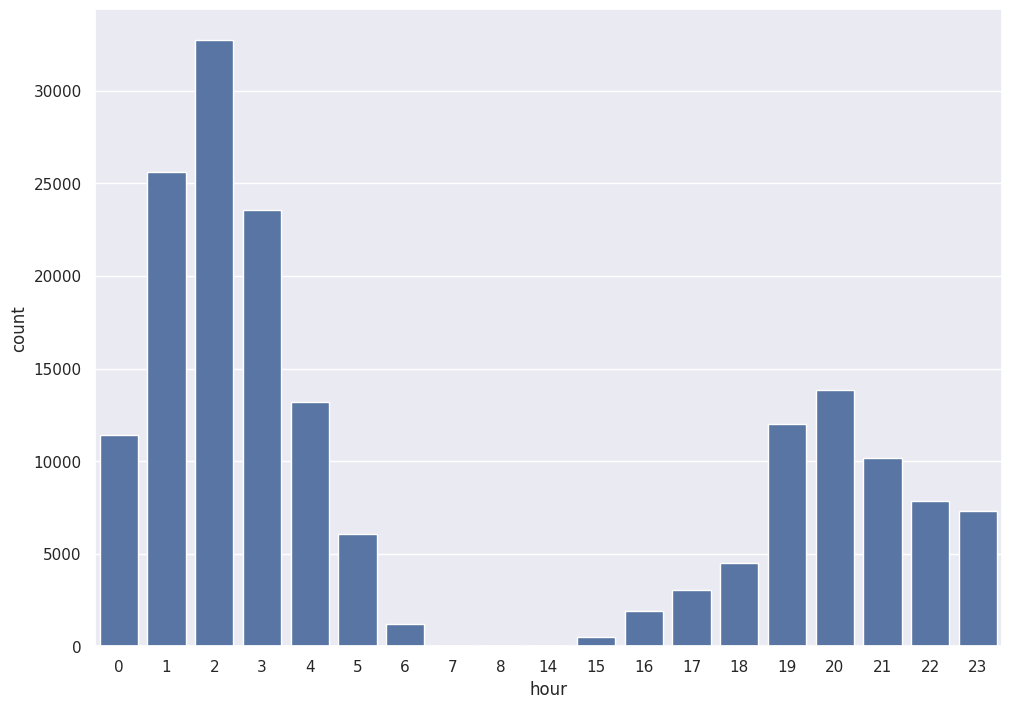

In [ ]:
sns.countplot(x=df.hour)

<Axes: xlabel='hour', ylabel='time_taken_mins'>

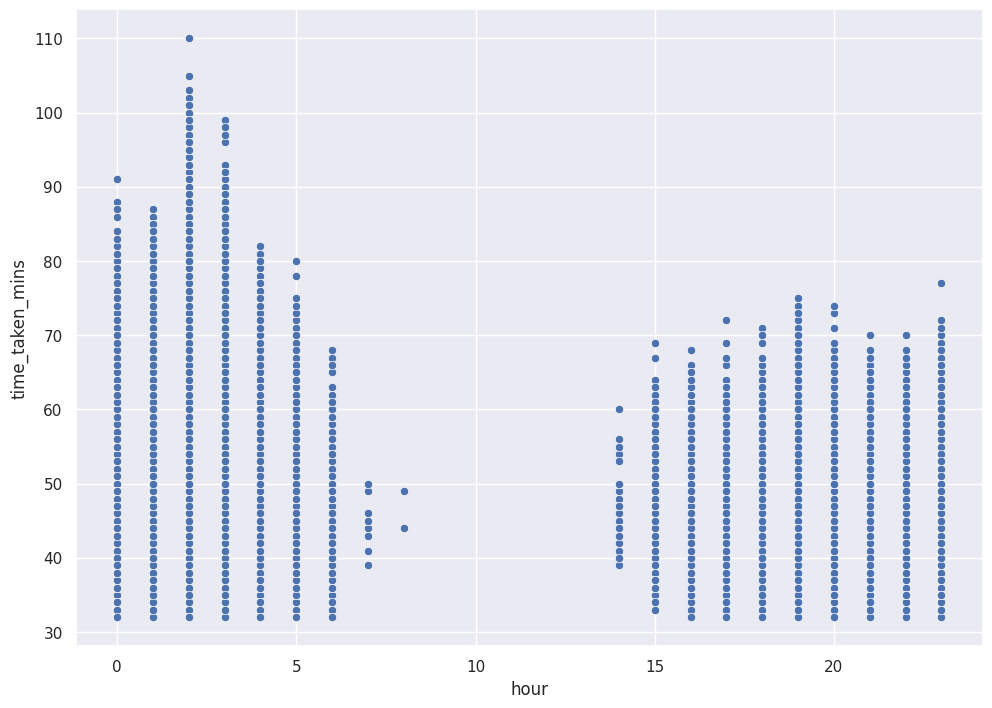

In [ ]:
sns.scatterplot(x='hour',y='time_taken_mins',data=df)

Data Splitting and Modelling

In [ ]:
y=df['time_taken_mins']
x=df.drop(['time_taken_mins'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,hour,day
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,22,4
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,21,1
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0,0
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,3,3
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,2,1


Random Forest

In [ ]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
prediction=regressor.predict(X_test)
mse=mean_squared_error(y_test,prediction)
rmse=mse**.5
print("mse : ",mse)
print("rmse : ",rmse)
mae=mean_absolute_error(y_test,prediction)
print("mase : ",mae)

mse :  3.230834289797085
rmse :  1.797452166205567
mase :  1.2858108030865962


In [ ]:
r2_score(y_test,prediction)

0.9624497976685897

In [ ]:
def MAPE(Y_actual,Y_Predicted):
    mape=np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [ ]:
print("mape : ",MAPE(y_test,prediction))

mape :  2.769349599500347


Text(0.5, 0, 'Random Forest Feature Importance')

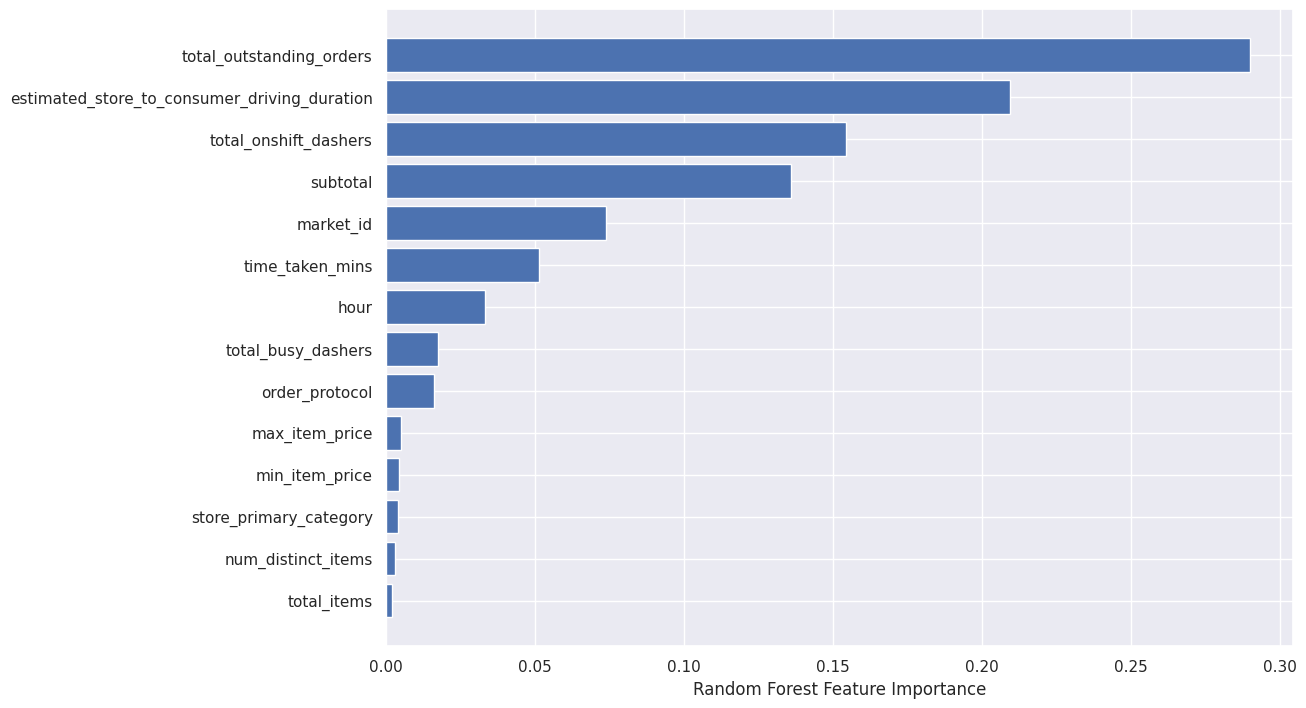

In [ ]:
sorted_idx=regressor.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx],regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Neural Networks

* Scalling the data to feed before neural network

In [ ]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
x_scaled=scaler.fit_transform(x)
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [ ]:
model=Sequential()
model.add(Dense(14,kernel_initializer='normal',activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='linear'))

In [ ]:
from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=0.01)
model.compile(loss='mse',optimizer=adam,metrics=['mse','mae'])
history=model.fit(X_train,y_train,epochs=30,batch_size=512,verbose=1,validation_split=0.2)

Epoch 1/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - loss: 309.2854 - mae: 11.8211 - mse: 309.2854 - val_loss: 7.2688 - val_mae: 1.9869 - val_mse: 7.2688
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - loss: 6.4915 - mae: 1.9073 - mse: 6.4915 - val_loss: 5.1629 - val_mae: 1.6983 - val_mse: 5.1629
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - loss: 4.5799 - mae: 1.5985 - mse: 4.5799 - val_loss: 2.1060 - val_mae: 1.0855 - val_mse: 2.1060
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - loss: 2.0445 - mae: 1.0862 - mse: 2.0445 - val_loss: 5.0025 - val_mae: 2.0795 - val_mse: 5.0025
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - loss: 1.4592 - mae: 0.9591 - mse: 1.4592 - val_loss: 0.4853 - val_mae: 0.5314 - val_mse: 0.4853
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - loss: 0.9628 - mae: 0.7420 - mse: 0.9628 - val_loss: 0.6414 - val_mae: 0.6626 - val_mse: 0.6414
Epoch 7/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 0.7913 - mae: 0.6716 

* we plot train and validation loss throughout training

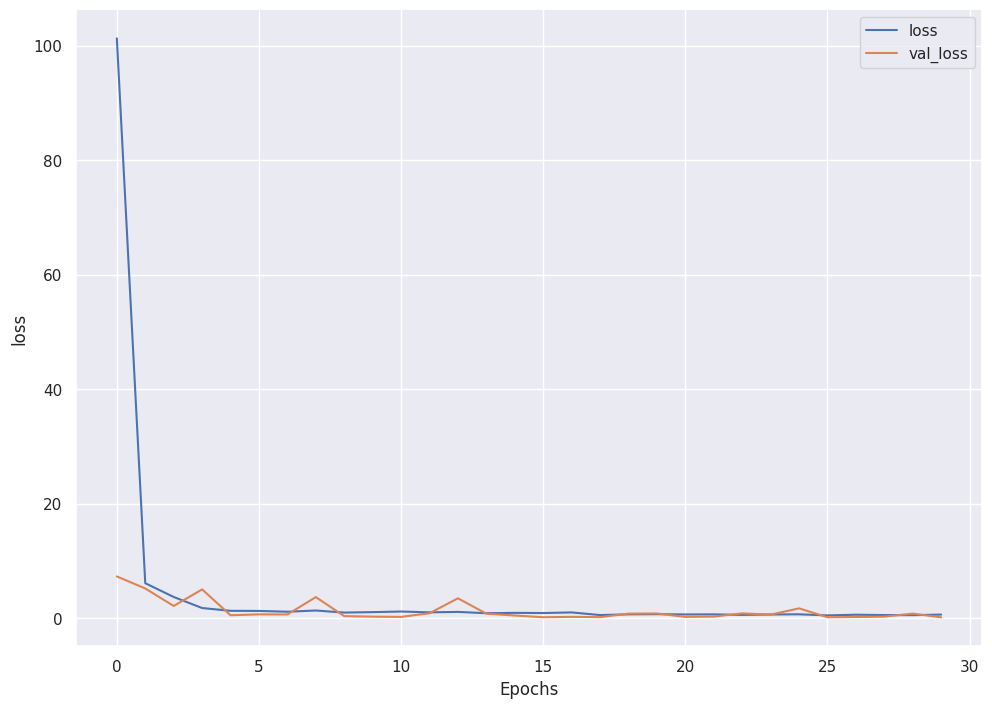

In [ ]:
def plot_history(history,key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key,'val_'+key])
    plt.show()
#plot the history
plot_history(history,'loss')

* val loss is below training loss so our model is not overfitting

In [ ]:
z= model.predict(X_test)

1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


In [ ]:
mse = mean_squared_error(y_test, z)
rmse = mse**.5
print("mse : ",mse)
print("rmse : ",rmse)
print("errors for neural net")
mae = mean_absolute_error(y_test, z)
print("mae : ",mae)

mse :  0.1271425616823703
rmse :  0.35657055638733026
errors for neural net
mae :  0.2930652762863015


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, z)

0.0066052688307998075

* By comparing the results of our neural network model with the random forest model we can see that without any tuning or creating pretty complex architectures for training our model we have achieved high accuracy